In [50]:
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import collections
import csv
from datetime import datetime, timedelta

from pprint import pprint as pp
import circlify as circ

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

DIR = os.getcwd()

# 2020 Contributions


In [51]:
df20 = pd.read_csv(DIR + "/2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df20_selections = df20[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA"]
df20_selections = df20_selections[~df20_selections.contributor_employer.str.contains('|'.join(faux))]
df20_selections = df20_selections[df20_selections["contribution_receipt_amount"] >= 0]

df20_biden = df20_selections[df20_selections["committee_name"].str.contains("BIDEN FOR PRESIDENT")]
df20_biden.reset_index()
df20_trump = df20_selections[df20_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]
df20_trump.reset_index()

df20_biden = df20_biden.groupby(["contribution_receipt_date"], as_index=False).sum()
df20_trump = df20_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

   trump_campaign_events biden_campaign_events dem_debates gop_debates  \
0                11/7/18               4/25/19     6/26/19     9/24/19   
1                6/18/19                4/8/20     7/30/19    10/26/19   
2                3/17/20               8/11/20     9/12/19    10/28/19   
3                8/24/20               8/18/20    10/15/19         NaN   
4                    NaN                   NaN    11/20/19         NaN   
5                    NaN                   NaN    12/19/19         NaN   
6                    NaN                   NaN     1/14/20         NaN   
7                    NaN                   NaN      2/7/20         NaN   
8                    NaN                   NaN     2/19/20         NaN   
9                    NaN                   NaN     2/25/20         NaN   
10                   NaN                   NaN     3/15/20         NaN   

   pres_debates     other  
0       9/29/20   5/24/20  
1       10/7/20  12/18/19  
2      10/15/20    2/5/20  

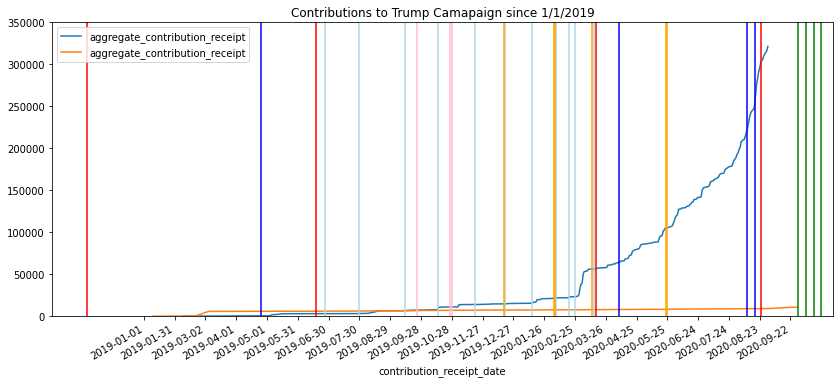

In [52]:
# plot data
t = np.arange(datetime(2019,1,1), datetime(2020,10,1), timedelta(days=30)).astype(datetime)
ymax = 350000

# find total donations
df20_biden = df20_biden.assign(aggregate_contribution_receipt=df20_biden["contribution_receipt_amount"].cumsum())

ax1 = df20_biden.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, ymax]) 
ax1.set_title("Contributions to Biden Campaign since 1/1/2019")

df20_trump = df20_trump.assign(aggregate_contribution_receipt=df20_trump["contribution_receipt_amount"].cumsum())

ax2 = df20_trump.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6), ax=ax1)  
ax2.set_xticks(t)
ax2.set_ylim([0, ymax]) 
ax2.set_title("Contributions to Trump Camapaign since 1/1/2019")

# import events spreadsheet to plot corresponding vertical lines
# see reporting document for what each date corresponds to
df20_events = pd.read_csv(DIR + "/2020events.csv") 
print(df20_events)

for dd in df20_events.loc[:,"dem_debates"]:
    plt.axvline(x=dd,color="lightblue")

for dd in df20_events.loc[:,"gop_debates"]:
    plt.axvline(x=dd,color="pink")

for dd in df20_events.loc[:,"biden_campaign_events"]:
    plt.axvline(x=dd,color="blue")

for dd in df20_events.loc[:,"trump_campaign_events"]:
    plt.axvline(x=dd,color="red")

for dd in df20_events.loc[:,"pres_debates"]:
    plt.axvline(x=dd,color="green")

for dd in df20_events.loc[:,"other"]:
    plt.axvline(x=dd,color="orange")


plt.savefig("2020TimeNEW.pdf", transparent=True)

In [72]:
# print dataframes to examine data at endpoints
pd.set_option('display.max_rows',None)
print(df20_biden)
# print(df20_trump)

20.00   
104                2020-03-13                        34.00   
105                2020-03-14                       150.00   
106                2020-03-15                       150.00   
107                2020-03-16                        19.00   
108                2020-03-17                        36.00   
109                2020-03-18                       753.12   
110                2020-03-20                        19.00   
111                2020-03-23                       250.00   
112                2020-03-24                        71.00   
113                2020-03-26                       250.00   
114                2020-03-27                        69.00   
115                2020-03-28                      2800.00   
116                2020-03-30                        25.00   
117                2020-03-31                       311.00   
118                2020-04-01                        30.33   
119                2020-04-02                       925.00   

# 2016 contributions

In [62]:
df16 = pd.read_csv(DIR + "/2015to2016contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df16_selections = df16[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA"]
df16_selections = df16_selections[~df16_selections.contributor_employer.str.contains('|'.join(faux))]
df16_selections = df16_selections[df16_selections["contribution_receipt_amount"] >= 0]

df16_clinton = df16_selections[df16_selections["committee_name"].str.contains("HILLARY FOR AMERICA")]
df16_clinton.reset_index()
df16_trump = df16_selections[df16_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]
df16_trump.reset_index()

# find donations to other Republicans (since the Trump donations are tiny)
gop = ["DONALD J. TRUMP FOR PRESIDENT, INC.","KASICH FOR AMERICA INC","CRUZ FOR PRESIDENT","MARCO RUBIO FOR PRESIDENT","JEB 2016, INC.","CHRIS CHRISTIE FOR PRESIDENT INC","PATAKI FOR PRESIDENT INC","REPUBLICAN NATIONAL COMMITTEE"]
df16_gop = df16_selections[df16_selections["committee_name"].str.contains('|'.join(gop))]

df16_clinton = df16_clinton.groupby(["contribution_receipt_date"], as_index=False).sum()
df16_trump = df16_trump.groupby(["contribution_receipt_date"], as_index=False).sum()
df16_gop = df16_gop.groupby(["contribution_receipt_date"], as_index=False).sum()

print(df16_gop.sum())
print(df16_trump.sum())


contribution_receipt_amount    18238.0
dtype: float64
contribution_receipt_amount    676.0
dtype: float64


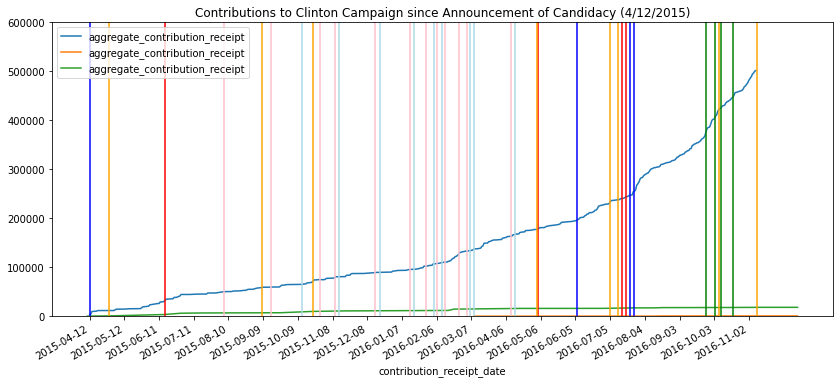

In [63]:
# plot data! 
t = np.arange(datetime(2015,4,12), datetime(2016,11,10), timedelta(days=30)).astype(datetime)
ymax16 = 600000

# get total donations over time 
df16_clinton = df16_clinton.assign(aggregate_contribution_receipt=df16_clinton["contribution_receipt_amount"].cumsum())

ax1 = df16_clinton.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, ymax16]) 
ax1.set_title("Contributions to Clinton Campaign since Announcement of Candidacy (4/12/2015)")

df16_trump = df16_trump.assign(aggregate_contribution_receipt=df16_trump["contribution_receipt_amount"].cumsum())

ax2 = df16_trump.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6), ax=ax1)  
ax2.set_xticks(t)
ax2.set_ylim([0, ymax16]) 

df16_gop = df16_gop.assign(aggregate_contribution_receipt=df16_gop["contribution_receipt_amount"].cumsum())

ax3 = df16_gop.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6), ax=ax2)  
ax3.set_xticks(t)
ax3.set_ylim([0, ymax16]) 

# import events spreadsheet to plot corresponding vertical lines
# see reporting document for what each date corresponds to
df16_events = pd.read_csv(DIR + "/2016events.csv")

for dd in df16_events.loc[:,"dem_debates"]:
    plt.axvline(x=dd,color="lightblue")

for dd in df16_events.loc[:,"gop_debates"]:
    plt.axvline(x=dd,color="pink")

for dd in df16_events.loc[:,"clinton_campaign_events"]:
    plt.axvline(x=dd,color="blue")

for dd in df16_events.loc[:,"trump_campaign_events"]:
    plt.axvline(x=dd,color="red")

for dd in df16_events.loc[:,"pres_debates"]:
    plt.axvline(x=dd,color="green")

for dd in df16_events.loc[:,"other"]:
    plt.axvline(x=dd,color="orange")


plt.savefig("2016TimeNEW.pdf", transparent=True)

In [77]:
# print dataframes to examine data at endpoints
# print(df16_clinton)
print(df16_trump)
# print(df16_gop)

  contribution_receipt_date  contribution_receipt_amount  \
0                2016-03-09                        150.8   
1                2016-06-03                         80.0   
2                2016-06-28                         40.0   
3                2016-08-06                          4.8   
4                2016-08-11                         28.0   
5                2016-08-17                        250.0   
6                2016-10-23                         80.0   
7                2016-12-08                          0.8   
8                2016-12-14                         41.6   

   aggregate_contribution_receipt  
0                           150.8  
1                           230.8  
2                           270.8  
3                           275.6  
4                           303.6  
5                           553.6  
6                           633.6  
7                           634.4  
8                           676.0  
